In [10]:
# /*==========================================================================================*\
# **                        _           _ _   _     _  _         _                            **
# **                       | |__  _   _/ | |_| |__ | || |  _ __ | |__                         **
# **                       | '_ \| | | | | __| '_ \| || |_| '_ \| '_ \                        **
# **                       | |_) | |_| | | |_| | | |__   _| | | | | | |                       **
# **                       |_.__/ \__,_|_|\__|_| |_|  |_| |_| |_|_| |_|                       **
# \*==========================================================================================*/


# Author: Bùi Tiến Thành (@bu1th4nh)
# Date: 2022/12/26 14:13 
# CTTN Toán tin K64


from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
%matplotlib inline

# Assignment parameters
alpha  = 12;
beta   = 7;


# Figure size
height = 6
width  = 9

## Xử lý dữ liệu, phase 1

In [11]:
df = pd.read_csv("DataWater_train.csv", parse_dates=[2])
display(df.head(5))

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,pH,EC,DO,TSS,TN,TP,TOC,ORP,Temp,TEMP,year,month,dow,hour,datehour
0,0,0,2017-07-11 14:05:00,7.29,1000.0,0.01,37.72,2.382600,118.301766,20.640303,257.62,32.64,28.204791,2017,2017-07,1,14,2017-07-11 14
1,1,1,2017-07-11 14:10:00,7.29,1000.0,0.01,37.18,7.284571,23.182876,14.900992,260.50,32.56,22.112042,2017,2017-07,1,14,2017-07-11 14
2,2,2,2017-07-11 14:15:00,7.29,1000.0,0.01,36.64,4.668972,11.363099,21.685466,255.54,32.54,33.116497,2017,2017-07,1,14,2017-07-11 14
3,3,3,2017-07-11 14:20:00,7.30,1000.0,0.01,36.25,2.146710,83.474613,24.299291,255.06,32.47,27.300682,2017,2017-07,1,14,2017-07-11 14
4,4,4,2017-07-11 14:25:00,7.31,1000.0,0.01,36.08,2.934312,12.725587,36.730378,258.62,32.42,33.866263,2017,2017-07,1,14,2017-07-11 14


In [12]:
df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'datehour', 'year', 'month', 'dow', 'hour'], axis=1, inplace=True)
display(df.head(5))

,Unnamed: 0,pH,EC,DO,TSS,TN,TP,TOC,ORP,Temp,TEMP
0,2017-07-11 14:05:00,7.29,1000.0,0.01,37.72,2.382600,118.301766,20.640303,257.62,32.64,28.204791
1,2017-07-11 14:10:00,7.29,1000.0,0.01,37.18,7.284571,23.182876,14.900992,260.50,32.56,22.112042
2,2017-07-11 14:15:00,7.29,1000.0,0.01,36.64,4.668972,11.363099,21.685466,255.54,32.54,33.116497
3,2017-07-11 14:20:00,7.30,1000.0,0.01,36.25,2.146710,83.474613,24.299291,255.06,32.47,27.300682
4,2017-07-11 14:25:00,7.31,1000.0,0.01,36.08,2.934312,12.725587,36.730378,258.62,32.42,33.866263


In [13]:
df.rename(columns={'Unnamed: 0': 'Time'}, inplace=True)
display(df.head(5))

,Time,pH,EC,DO,TSS,TN,TP,TOC,ORP,Temp,TEMP
0,2017-07-11 14:05:00,7.29,1000.0,0.01,37.72,2.382600,118.301766,20.640303,257.62,32.64,28.204791
1,2017-07-11 14:10:00,7.29,1000.0,0.01,37.18,7.284571,23.182876,14.900992,260.50,32.56,22.112042
2,2017-07-11 14:15:00,7.29,1000.0,0.01,36.64,4.668972,11.363099,21.685466,255.54,32.54,33.116497
3,2017-07-11 14:20:00,7.30,1000.0,0.01,36.25,2.146710,83.474613,24.299291,255.06,32.47,27.300682
4,2017-07-11 14:25:00,7.31,1000.0,0.01,36.08,2.934312,12.725587,36.730378,258.62,32.42,33.866263


In [14]:
df.set_index('Time', inplace=True)
display(df.head(5))

,pH,EC,DO,TSS,TN,TP,TOC,ORP,Temp,TEMP
Time,,,,,,,,,,
2017-07-11 14:05:00,7.29,1000.0,0.01,37.72,2.382600,118.301766,20.640303,257.62,32.64,28.204791
2017-07-11 14:10:00,7.29,1000.0,0.01,37.18,7.284571,23.182876,14.900992,260.50,32.56,22.112042
2017-07-11 14:15:00,7.29,1000.0,0.01,36.64,4.668972,11.363099,21.685466,255.54,32.54,33.116497
2017-07-11 14:20:00,7.30,1000.0,0.01,36.25,2.146710,83.474613,24.299291,255.06,32.47,27.300682
2017-07-11 14:25:00,7.31,1000.0,0.01,36.08,2.934312,12.725587,36.730378,258.62,32.42,33.866263


In [15]:
df.to_parquet('DataWater_train.parquet', index=True, engine='fastparquet')

## Xử lý dữ liệu, phase 2

In [18]:
Ariel = pd.read_parquet('DataWater_train.parquet');
display(Ariel.head(5))

,pH,EC,DO,TSS,TN,TP,TOC,ORP,Temp,TEMP
Time,,,,,,,,,,
2017-07-11 14:05:00,7.29,1000.0,0.01,37.72,2.382600,118.301766,20.640303,257.62,32.64,28.204791
2017-07-11 14:10:00,7.29,1000.0,0.01,37.18,7.284571,23.182876,14.900992,260.50,32.56,22.112042
2017-07-11 14:15:00,7.29,1000.0,0.01,36.64,4.668972,11.363099,21.685466,255.54,32.54,33.116497
2017-07-11 14:20:00,7.30,1000.0,0.01,36.25,2.146710,83.474613,24.299291,255.06,32.47,27.300682
2017-07-11 14:25:00,7.31,1000.0,0.01,36.08,2.934312,12.725587,36.730378,258.62,32.42,33.866263


In [19]:
# import pandas_profiling as pp
# Belle = pp.ProfileReport(Ariel)
# Belle.to_file('Belle_phase1.html')

In [20]:
# Ariel.plot(subplots=True, figsize=(20, 30), layout=(5, 2))

## Xử lý dữ liệu, phase 3

### pH: Từ 0-14

In [21]:
Ariel["pH"] = Ariel["pH"].apply(lambda x: x if x >= 0 and x <= 14 else np.nan);

### EC: Từ 0-50000
https://mrccc.org.au/wp-content/uploads/2013/10/Water-Quality-Salinity-Standards.pdf 

In [22]:
Ariel["EC"] = Ariel["EC"].apply(lambda x: x if x > 0 and x < 50000 else np.nan);

### DO: Từ 0-12
https://www.enr.gov.nt.ca/sites/enr/files/dissolved_oxygen.pdf 

In [23]:
Ariel["DO"] = Ariel["DO"].apply(lambda x: x if x > 0 and x <= 12 else np.nan);

### TSS: Từ 0-1000
https://www.onsiteinstaller.com/online_exclusives/2017/09/an_installers_guide_to_total_suspended_solids#:~:text=Raw%20wastewater%20has%20a%20TSS,be%20below%2025%20mg%2FL. 

In [24]:
Ariel["TSS"] = Ariel["TSS"].apply(lambda x: x if x > 0 and x < 1000 else np.nan);

### TN: Từ 0-15
https://dnr.wi.gov/topic/opcert/documents/StudyGuideNutrientRemovalTotalNitrogen.pdf
https://www.sciencedirect.com/science/article/pii/S1674237017300807# 
https://treeo.ufl.edu/media/treeoufledu/waterwastewater/student-resources/Nitrogen-control-in--wastewater-treatment-plants-v4.pdf

In [25]:
Ariel["TN"] = Ariel["TN"].apply(lambda x: x if x > 0 and x <= 15 else np.nan);

### TP: 0-800ug/l
https://vanbanphapluat.co/tcvn-6202-2008-chat-luong-nuoc-xac-dinh-phosphophuong-phap-do-pho-dung-amoni-m#:~:text=Ph%E1%BA%A1m%20vi%20%C3%A1p%20d%E1%BB%A5ng&text=C%C3%A1c%20ph%C6%B0%C6%A1ng%20ph%C3%A1p%20n%C3%A0y%20c%C3%B3,n%C3%A0y%20kh%C3%B4ng%20c%E1%BA%A7n%20pha%20lo%C3%A3ng. 

In [26]:
Ariel["TP"] = Ariel["TP"].apply(lambda x: x if x > 0 and x <= 800 else np.nan);

### TOC: 0-40

In [27]:
Ariel["TOC"] = Ariel["TOC"].apply(lambda x: x if x > 0 and x <= 40 else np.nan);

### ORP: -1500 -> 1500
https://www.yokogawa.com/in/library/resources/white-papers/basics-of-orp/#:~:text=The%20full%20range%20is%20typically,capable%20of%20absorbing%20hydrogen%20ions.

In [28]:
Ariel["ORP"] = Ariel["ORP"].apply(lambda x: x if x > -1500 and x < 1500 else np.nan);

### Temp: 3-60

### Plot lại data

array([[<AxesSubplot: xlabel='Time'>, <AxesSubplot: xlabel='Time'>],
       [<AxesSubplot: xlabel='Time'>, <AxesSubplot: xlabel='Time'>],
       [<AxesSubplot: xlabel='Time'>, <AxesSubplot: xlabel='Time'>],
       [<AxesSubplot: xlabel='Time'>, <AxesSubplot: xlabel='Time'>],
       [<AxesSubplot: xlabel='Time'>, <AxesSubplot: xlabel='Time'>]],
      dtype=object)

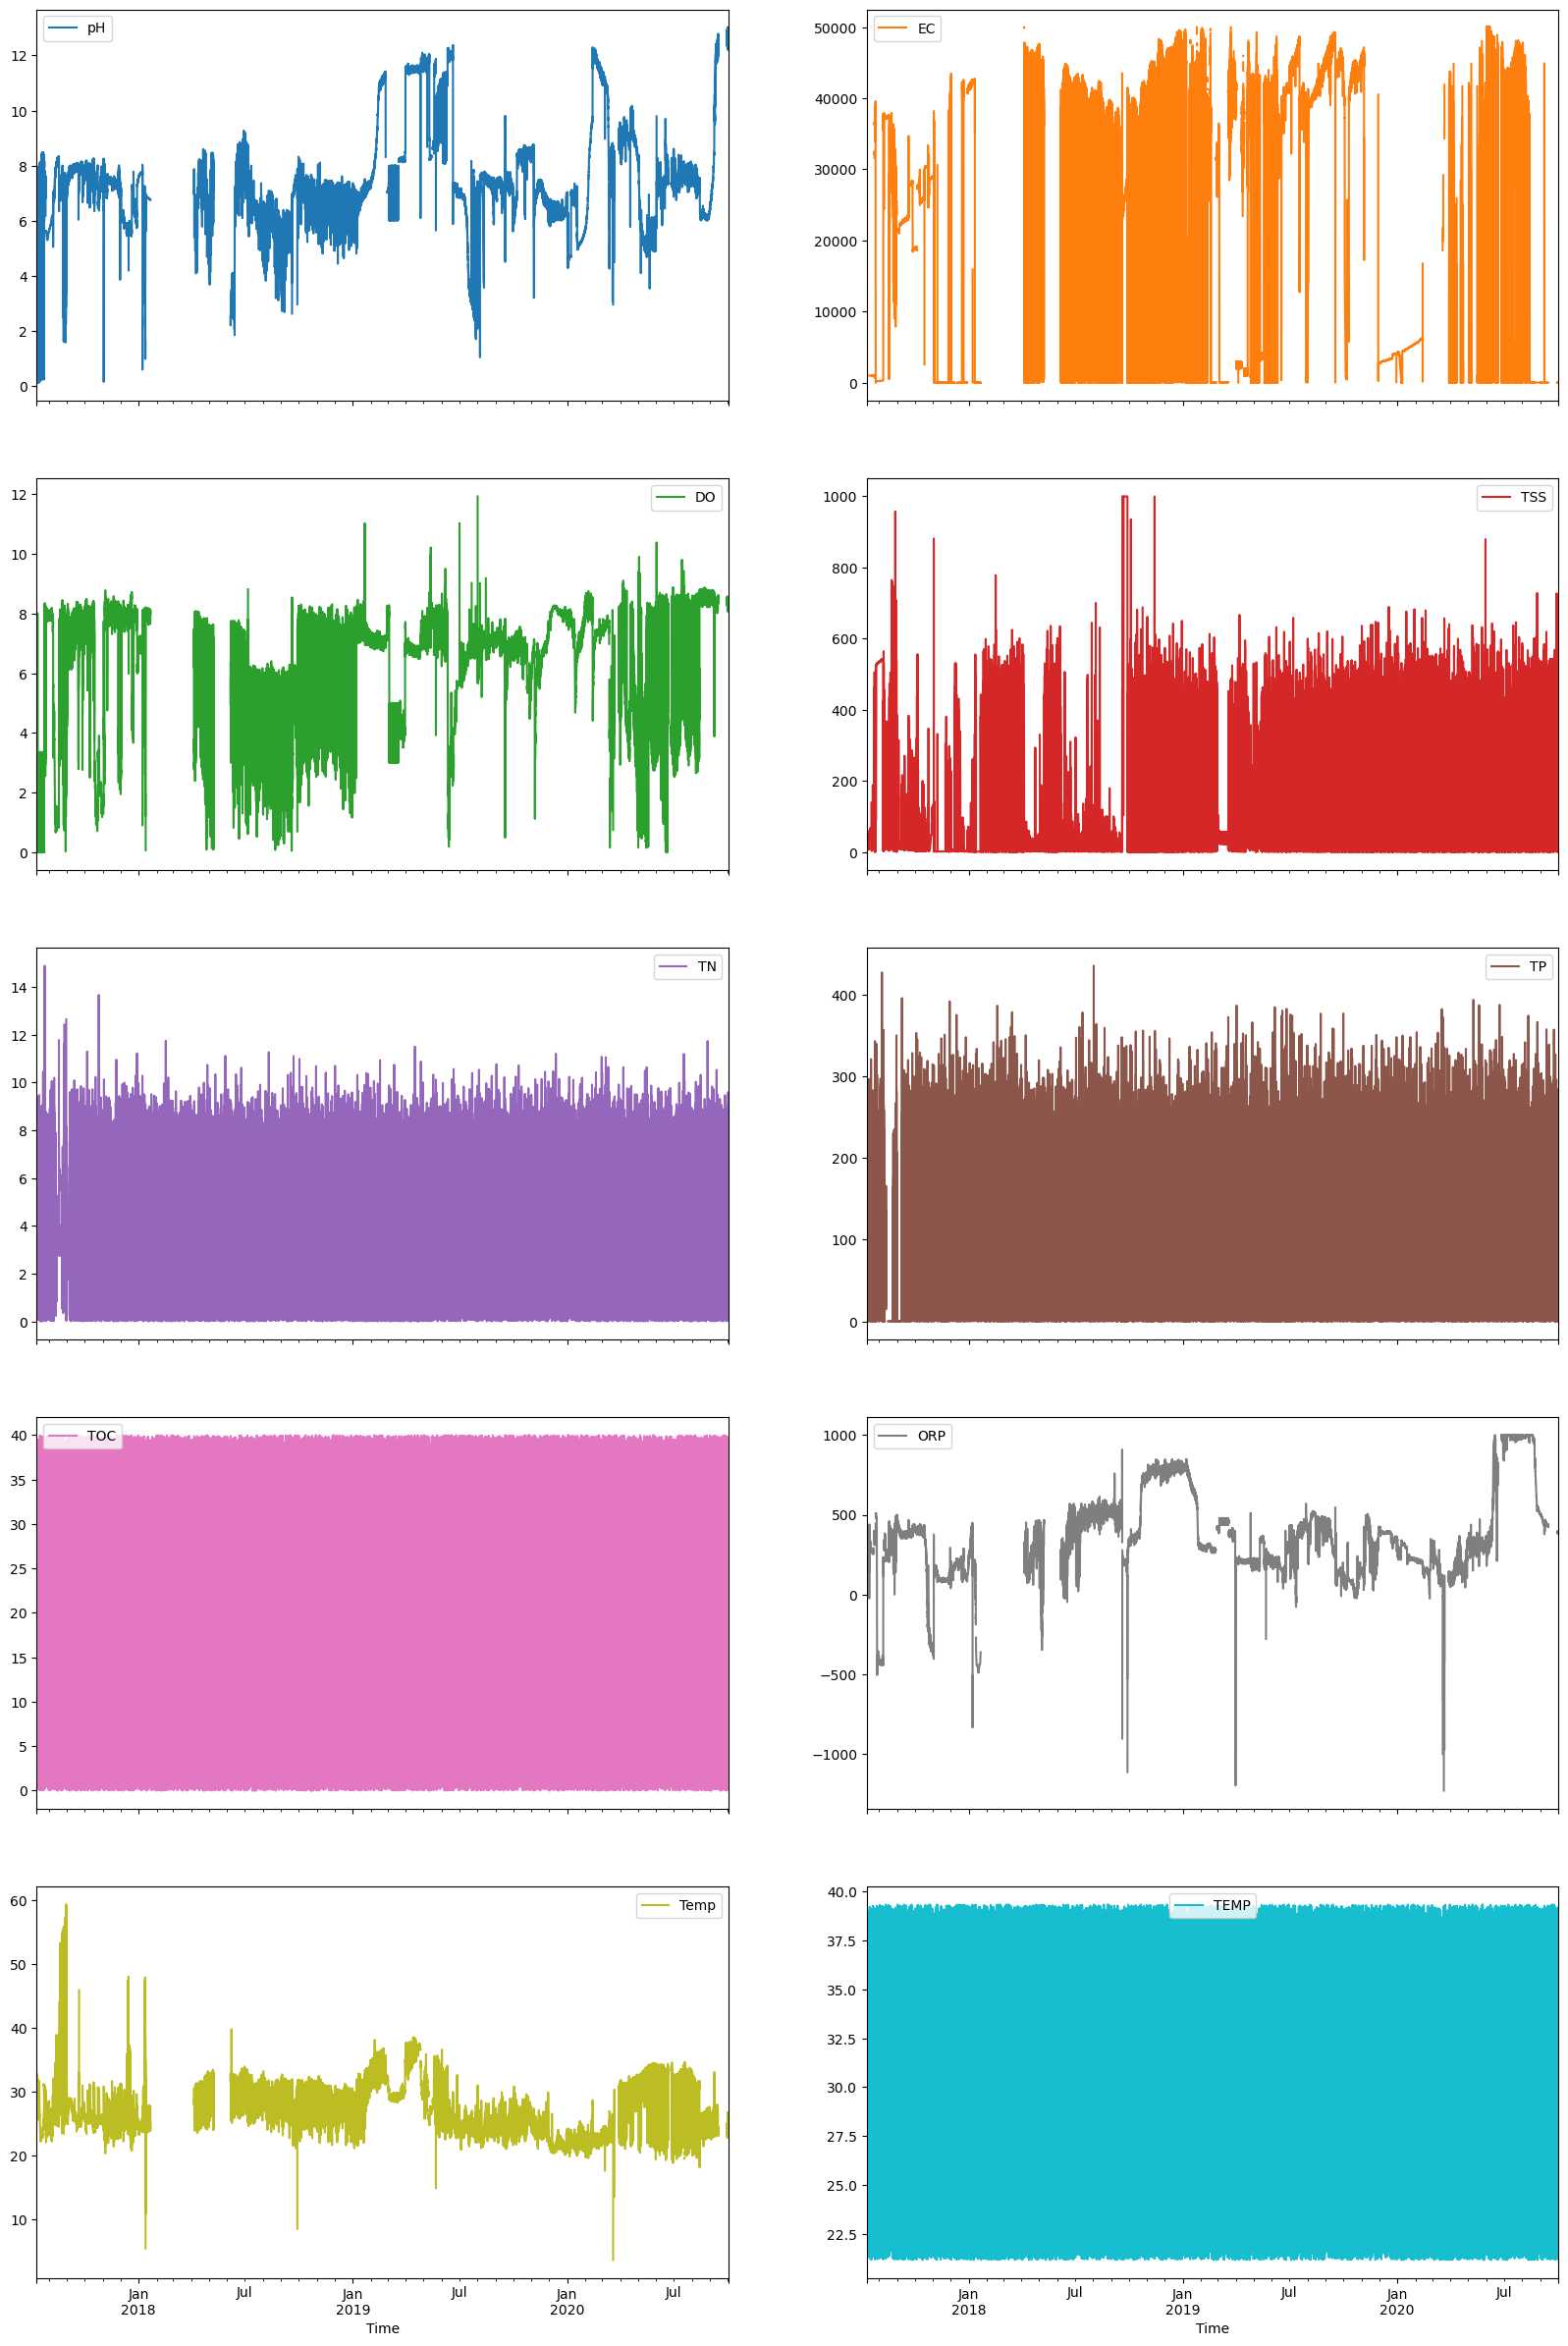

In [29]:
Ariel.plot(subplots=True, figsize=(20, 30), layout=(5, 2))

In [30]:
# import pandas_profiling as pp
# Belle = pp.ProfileReport(Ariel)
# Belle.to_file('Belle_cleansed_phase2.html')

In [31]:
# Ariel.to_parquet('DataWater_train_cleansed_phase2.parquet', index=True, engine='fastparquet')


## Xử lý dữ liệu, phase 4

array([[<AxesSubplot: xlabel='Time'>, <AxesSubplot: xlabel='Time'>],
       [<AxesSubplot: xlabel='Time'>, <AxesSubplot: xlabel='Time'>],
       [<AxesSubplot: xlabel='Time'>, <AxesSubplot: xlabel='Time'>],
       [<AxesSubplot: xlabel='Time'>, <AxesSubplot: xlabel='Time'>],
       [<AxesSubplot: xlabel='Time'>, <AxesSubplot: xlabel='Time'>]],
      dtype=object)

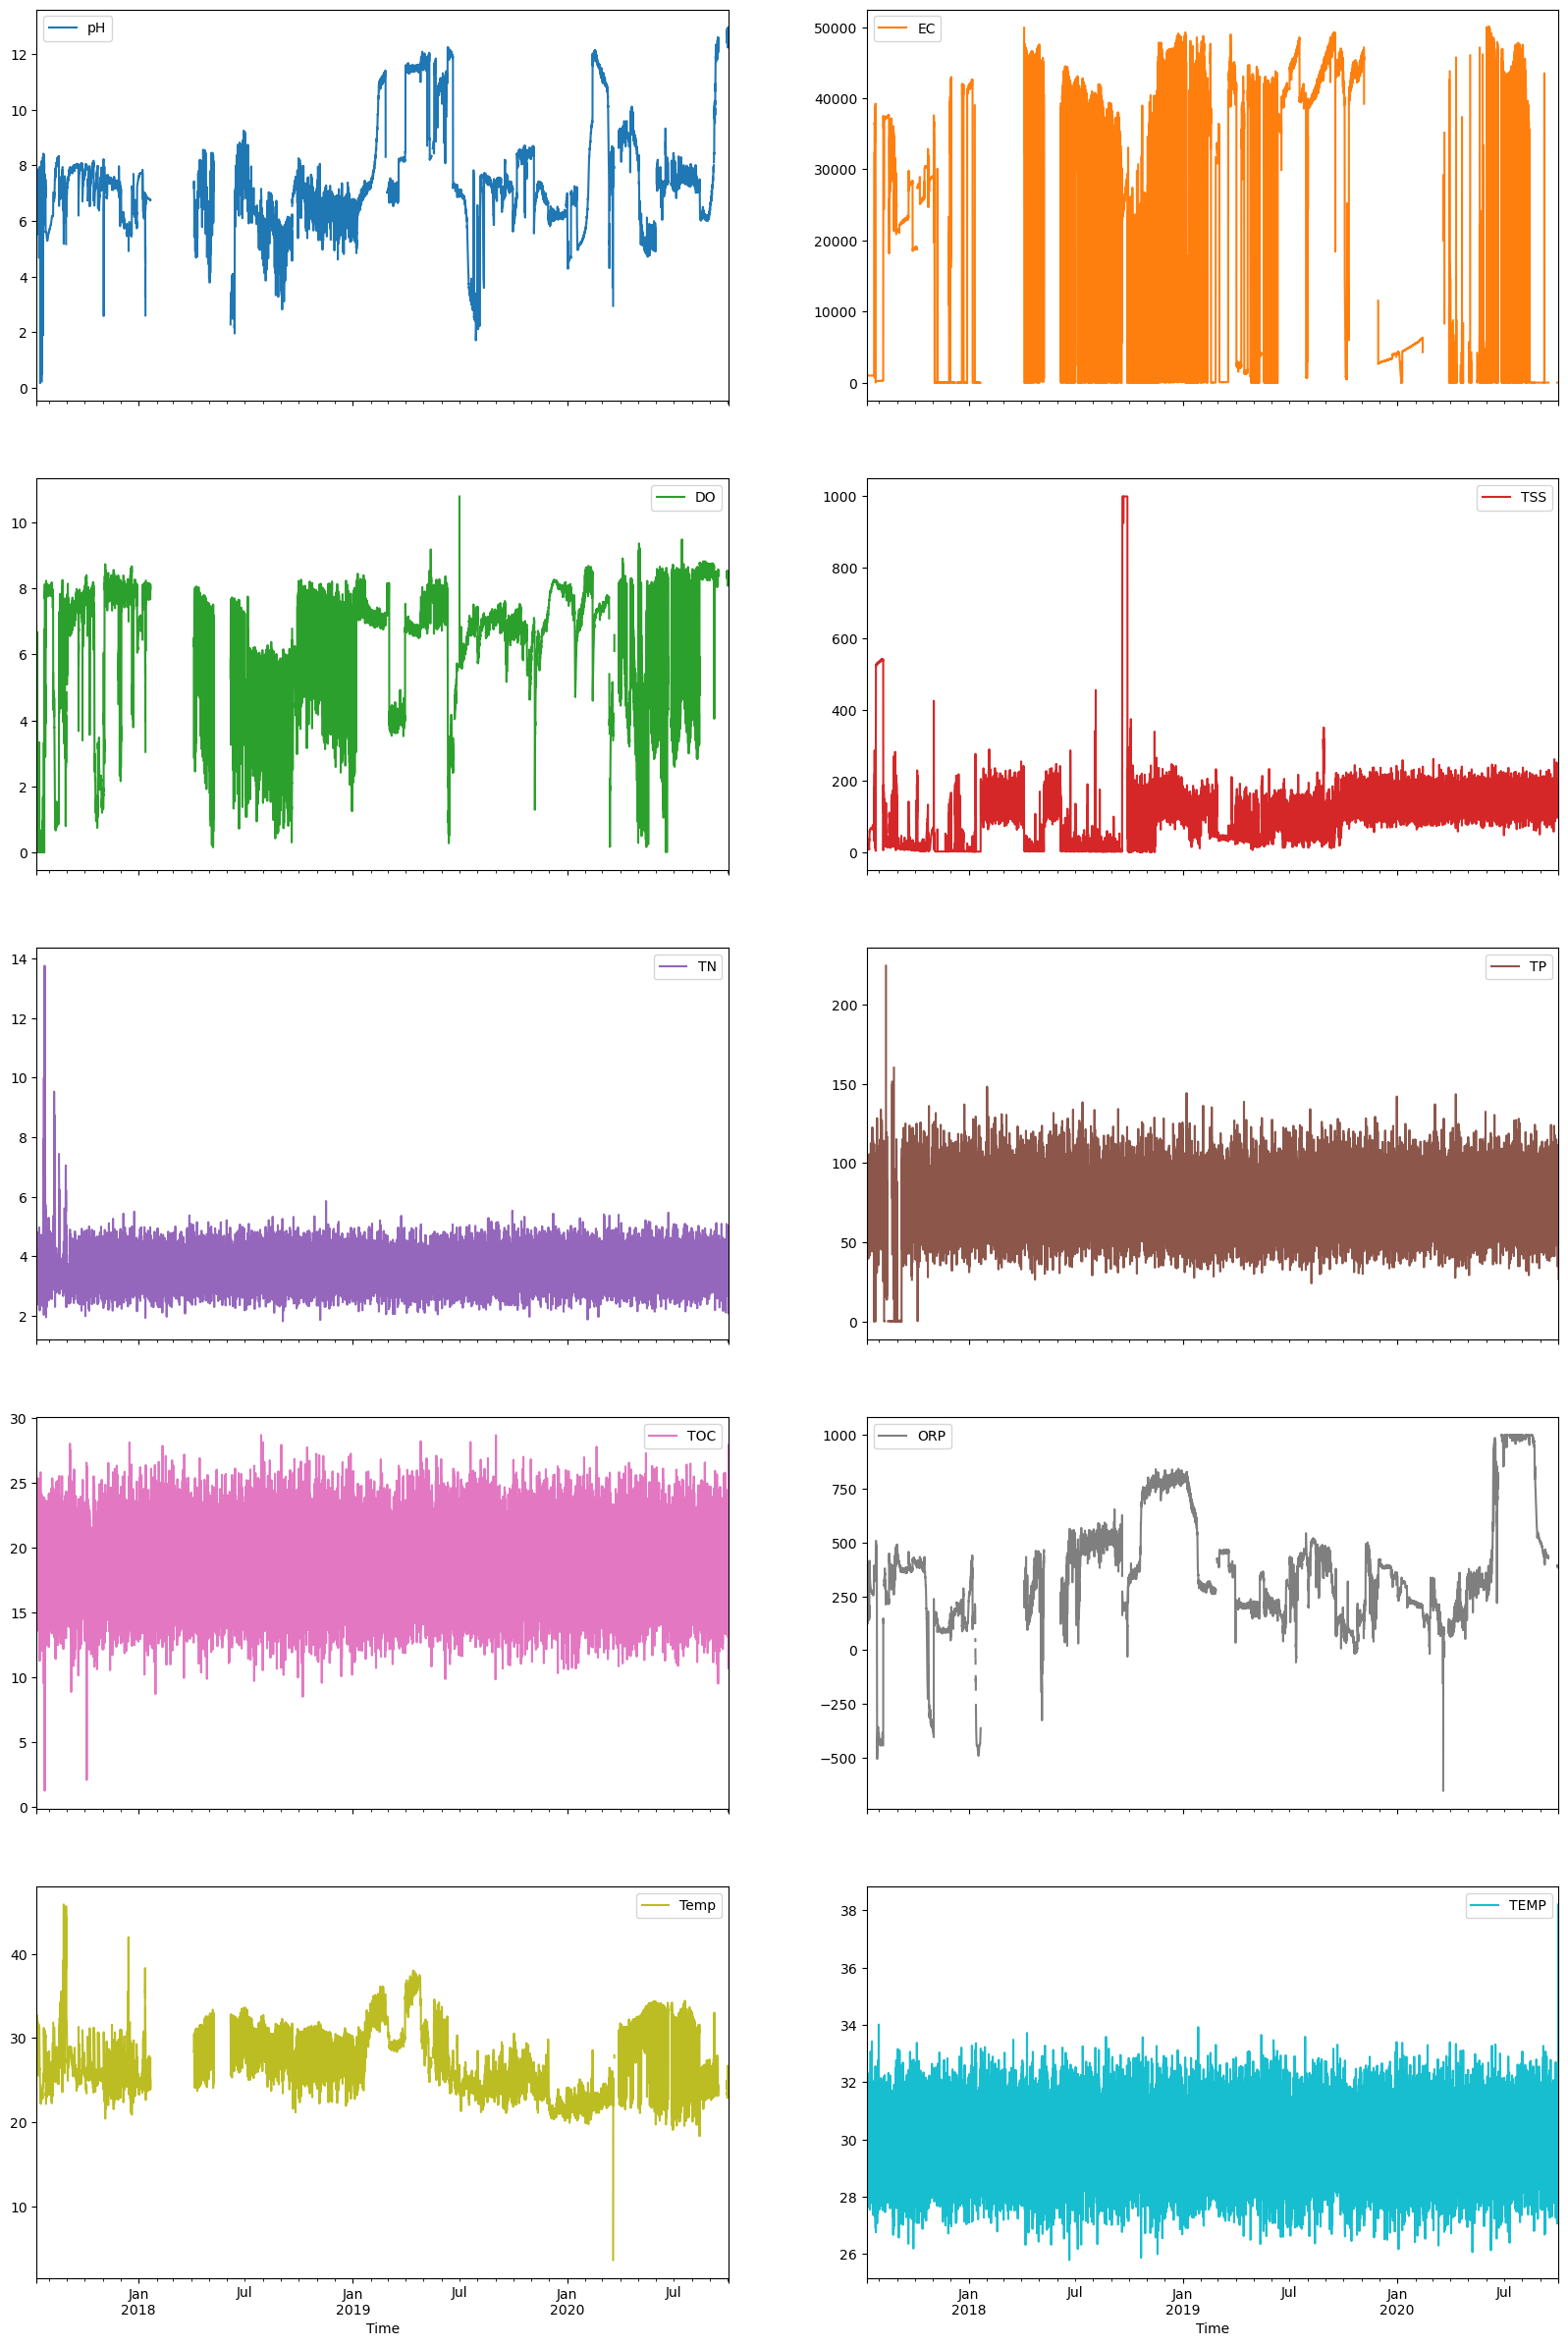

In [33]:
Ariel = Ariel.resample('H').mean()
Ariel.plot(subplots=True, figsize=(20, 30), layout=(5, 2))

In [35]:
import pandas_profiling as pp
Belle = pp.ProfileReport(Ariel)
Belle.to_file('Belle_cleansed_phase3.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
Ariel.to_parquet('DataWater_train_cleansed_phase3.parquet', index=True, engine='fastparquet')
